<h1>CNN modeli za prepoznavanje šalica</h1>
<hr/>
<h2>Model Bravo</h2>
<p>Testovi sa promjenama broja epoha i veličine batcheva</p>
<p> Nakon testova i loših rezultata validacije na setu slika 700/100 po klasi, (MOdel Alfa) , pokušat ćes se poboljšati rezultati povećanjem broja slika - dodavanjaem vodoravnog okreta na svim trening slikama (skripta: flipper.py)</p>

<p>Uvoženje potrebnih modula:</p>

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np


<p>Postavljanje direktorija sa trening i validacijskim slikama:</p>

In [3]:
# Postavi direktorije slika
train_dir = "Projekt_slike_128/Trening"
test_dir = "Projekt_slike_128/Validacija"



<p>Odabir broja epoha i veličine batch-eva:</p>

In [1]:
# Odredi broj epoha i veličinu batcheva
num_of_epochs = input("Number of epochs:")
num_of_epochs = int(num_of_epochs)
size_of_batch = input("Batch size:")
size_of_batch = int(size_of_batch)


Number of epochs: 20
Batch size: 128


<p>Generiranje podataka:</p>

In [37]:
# Generatori podataka
train_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(128, 128), batch_size=size_of_batch, class_mode="categorical"
)

test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=(128, 128), batch_size=size_of_batch, class_mode="categorical"
)


Found 4200 images belonging to 3 classes.
Found 750 images belonging to 3 classes.


<p>Prikaz slika iz svake klase: </p>

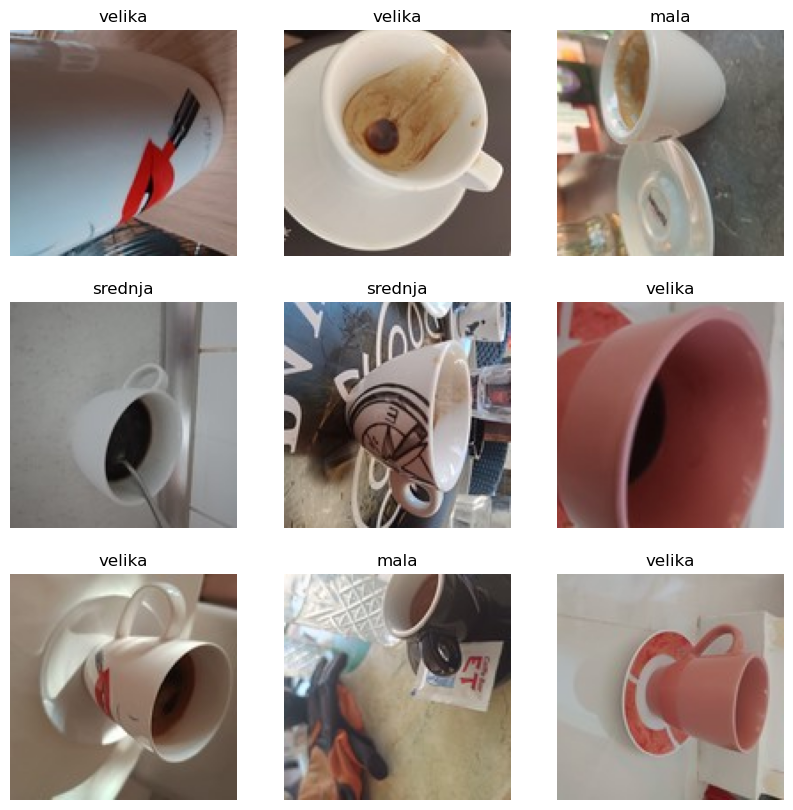

In [21]:
# Primjeri slika
def display_sample_images(generator):
    x, y = next(generator)
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(x[i])
        
        if (np.argmax(y[i])==0):
            plt.title("mala")
        if (np.argmax(y[i])==1):
            plt.title("srednja")
        if (np.argmax(y[i])==2):
            plt.title("velika")
        plt.axis("off")
    plt.show()


display_sample_images(train_generator)


<p>Jednostavnosti radi, veličine šalica nazvanje su mala, srednja i velika.
Srednja šalica je "velika šalica za crnu kavu", a velika šalica je "šalica za bijelu kavu".</p>

<hr/>
<p>Izgradnja osnovnog CNN modela za prepoznavanje šalica:</p>

In [38]:
# CNN model
model = Sequential(
    [
        Conv2D(32, (3, 3), activation="relu", input_shape=(128, 128, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation="relu"),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation="relu"),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(512, activation="relu"),
        Dense(3, activation="softmax"),
    ]
)
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 63, 63, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 14, 14, 128)      

<p>Kompajliranje i treniranje modela</p>

<hr/>
<h2>MOdel B.1</h2>
<p>broj epoha: 20</p>
<p>veličina batch-a:64</p>

In [17]:
# Kompajliranje
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Treniranje
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=num_of_epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
)


Epoch 1/20
65/65 [==============================] - 38s 519ms/step - loss: 0.6431 - accuracy: 0.7307 - val_loss: 0.9001 - val_accuracy: 0.6023
Epoch 2/20
65/65 [==============================] - 33s 506ms/step - loss: 0.4125 - accuracy: 0.8368 - val_loss: 0.9654 - val_accuracy: 0.6151
Epoch 3/20
65/65 [==============================] - 33s 509ms/step - loss: 0.2697 - accuracy: 0.8985 - val_loss: 1.3020 - val_accuracy: 0.6151
Epoch 4/20
65/65 [==============================] - 33s 506ms/step - loss: 0.2049 - accuracy: 0.9243 - val_loss: 1.8652 - val_accuracy: 0.5327
Epoch 5/20
65/65 [==============================] - 33s 509ms/step - loss: 0.1160 - accuracy: 0.9579 - val_loss: 1.8871 - val_accuracy: 0.5668
Epoch 6/20
65/65 [==============================] - 33s 507ms/step - loss: 0.0611 - accuracy: 0.9819 - val_loss: 3.0831 - val_accuracy: 0.5355
Epoch 7/20
65/65 [==============================] - 33s 510ms/step - loss: 0.0265 - accuracy: 0.9942 - val_loss: 3.7042 - val_accuracy: 0.4986

<hr/>
<p>Plot točnosti i gubitka, </p>
<p>Evaluacija modela B.1:</p>

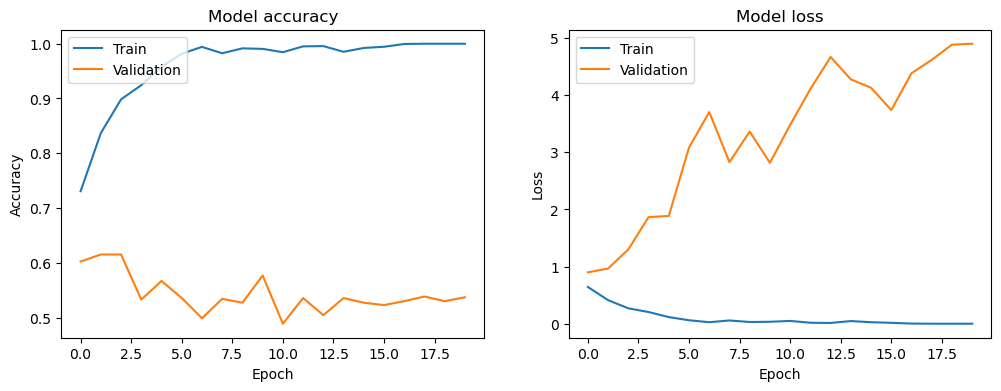

11/11 [==============================] - 2s 159ms/step - loss: 4.9737 - accuracy: 0.5369
Test accuracy: 0.5369318127632141


In [18]:
# Plot točnosti treninga i validacije
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()



# Evaluacija modela
test_loss, test_acc = model.evaluate(
    test_generator, steps=test_generator.samples // test_generator.batch_size
)
print("Test accuracy:", test_acc)


<hr/>
<h2>MOdel B.2</h2>
<p>broj epoha: 50</p>
<p>veličina batch-a:64</p>

In [23]:
# Kompajliranje
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Treniranje
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=num_of_epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
)

Epoch 1/50
65/65 [==============================] - 38s 517ms/step - loss: 1.0937 - accuracy: 0.4681 - val_loss: 1.0459 - val_accuracy: 0.4702
Epoch 2/50
65/65 [==============================] - 32s 495ms/step - loss: 0.7288 - accuracy: 0.6806 - val_loss: 1.0025 - val_accuracy: 0.5085
Epoch 3/50
65/65 [==============================] - 33s 511ms/step - loss: 0.5004 - accuracy: 0.7991 - val_loss: 1.0418 - val_accuracy: 0.5469
Epoch 4/50
65/65 [==============================] - 32s 495ms/step - loss: 0.3434 - accuracy: 0.8711 - val_loss: 1.8640 - val_accuracy: 0.5611
Epoch 5/50
65/65 [==============================] - 33s 508ms/step - loss: 0.2692 - accuracy: 0.8977 - val_loss: 1.6805 - val_accuracy: 0.5810
Epoch 6/50
65/65 [==============================] - 32s 497ms/step - loss: 0.1698 - accuracy: 0.9379 - val_loss: 1.6742 - val_accuracy: 0.5668
Epoch 7/50
65/65 [==============================] - 33s 508ms/step - loss: 0.1158 - accuracy: 0.9618 - val_loss: 2.7686 - val_accuracy: 0.5284

<hr/>
<p>Plot točnosti i gubitka, </p>
<p>Evaluacija modela B.2:</p>

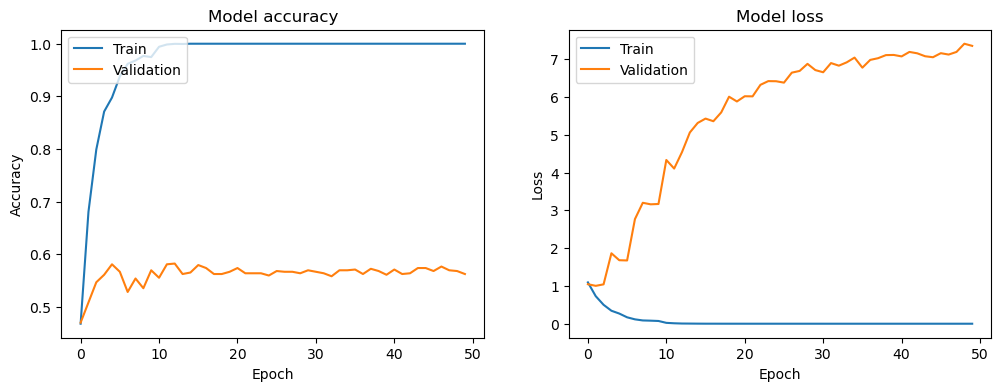

11/11 [==============================] - 2s 159ms/step - loss: 7.1794 - accuracy: 0.5696
Test accuracy: 0.5696022510528564


In [25]:
# Plot točnosti treninga i validacije
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()



# Evaluacija modela
test_loss, test_acc = model.evaluate(
    test_generator, steps=test_generator.samples // test_generator.batch_size
)
print("Test accuracy:", test_acc)

<hr/>
<h2>MOdel B.3</h2>
<p>broj epoha: 20</p>
<p>veličina batch-a:128</p>

In [32]:
# Kompajliranje
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Treniranje
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=num_of_epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size,
)


Epoch 1/20
32/32 [==============================] - 37s 1s/step - loss: 1.1848 - accuracy: 0.4479 - val_loss: 1.0440 - val_accuracy: 0.4734
Epoch 2/20
32/32 [==============================] - 34s 1s/step - loss: 0.7564 - accuracy: 0.6540 - val_loss: 1.0461 - val_accuracy: 0.4469
Epoch 3/20
32/32 [==============================] - 33s 1s/step - loss: 0.6433 - accuracy: 0.7252 - val_loss: 1.3346 - val_accuracy: 0.4797
Epoch 4/20
32/32 [==============================] - 32s 988ms/step - loss: 0.4697 - accuracy: 0.8087 - val_loss: 1.4351 - val_accuracy: 0.4922
Epoch 5/20
32/32 [==============================] - 33s 1s/step - loss: 0.4850 - accuracy: 0.8055 - val_loss: 1.5301 - val_accuracy: 0.5484
Epoch 6/20
32/32 [==============================] - 34s 1s/step - loss: 0.3688 - accuracy: 0.8554 - val_loss: 1.3060 - val_accuracy: 0.5781
Epoch 7/20
32/32 [==============================] - 31s 976ms/step - loss: 0.2840 - accuracy: 0.8912 - val_loss: 1.1771 - val_accuracy: 0.5813
Epoch 8/20
32/

<hr/>
<p>Plot točnosti i gubitka, </p>
<p>Evaluacija modela B.3:</p>

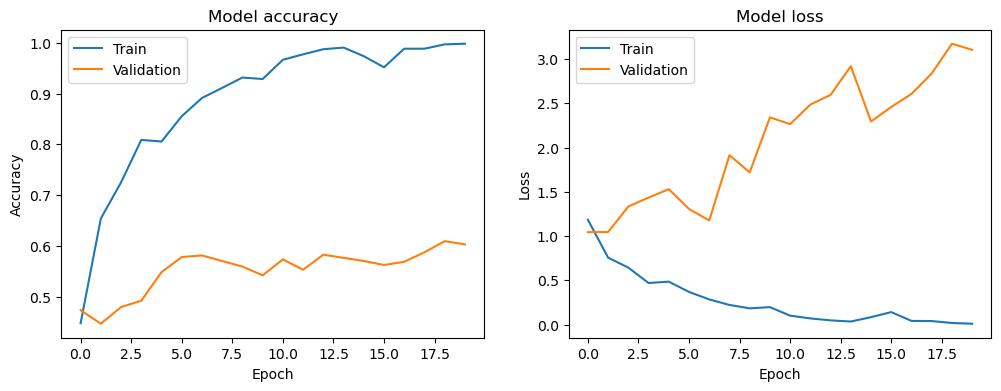

5/5 [==============================] - 2s 275ms/step - loss: 2.9111 - accuracy: 0.6078
Test accuracy: 0.6078125238418579


In [33]:
# Plot točnosti treninga i validacije
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()



# Evaluacija modela
test_loss, test_acc = model.evaluate(
    test_generator, steps=test_generator.samples // test_generator.batch_size
)
print("Test accuracy:", test_acc)

<hr/>
<h2>Zaključak:</h2>
<p>POvećanje broja slika u terningu na 1400 po klasi i 250 po validaciji nije donijelo značajnija poboljšanja. Model je overfittan, a točnost iako daleko bolja od modela_0, je tek marginalno bolja od modela_alfa. Kompleksonst modela (preko 12000000 parametara) utječe na overfitting.</p>
<p> Sljedeći korak: <ul><li>vratiti set slika na 700/100 po klasi</li><li>pojednostavniti početni model, drastično smanjiti broj parametara</li></ul> </p>